In [1]:
import sys  # This import is rarely used in data analysis. It might be for specific system interactions.
import numpy as np  # This library provides powerful array and numerical operations. It's essential for scientific computing.
import pandas as pd  # This library offers data structures like DataFrames and Series, along with data manipulation and analysis tools.
import matplotlib  # This import is usually followed by `matplotlib.pyplot` for plotting functionalities.
import matplotlib.pyplot as plt  # This import provides functionalities for creating various plots and visualizations.
# Inline plotting using magic command
%matplotlib inline  # This magic command displays plots within Jupyter Notebooks or similar environments.
import seaborn as sns  # This library builds on top of matplotlib for creating statistical data visualizations.
import warnings  # This library allows controlling warning messages displayed during code execution.
warnings.filterwarnings('ignore')  # This line suppresses all warning messages (not recommended for general use).
import os  # This library provides functionalities for interacting with the operating system, like file paths.

UsageError: unrecognized arguments: # This magic command displays plots within Jupyter Notebooks or similar environments.


In [2]:
#Path of the data Set
data = pd.read_csv('/kaggle/input/teadatafinal/TeaData.csv')
data.head(5)

,Elevation,Grade_Type,TDS_Level_of_Water (ppm),pH_Level_of_Water,Tasting_Temperature (0C),Brewing_Time (min),pH_Value,TDS_Value (ppm),R,G,B,Taste_Type,Acceptance
0,1,1,120.05,6.68,32.34,3,5.01,162.33,223,52,0,1,1
1,1,1,122.90,6.72,32.37,3,5.07,162.96,209,58,4,1,1
2,1,1,125.35,6.77,32.00,3,5.08,160.82,216,53,6,1,1
3,1,1,121.80,6.81,32.34,3,4.93,162.57,209,58,6,1,1
4,1,1,118.45,6.86,32.00,3,5.12,163.44,215,57,3,1,1


In [3]:
# Count occurrences of each unique value in 'Acceptance ' column
data.value_counts('Acceptance ')

Acceptance 
0    586
1    559
dtype: int64

In [4]:
# Count high-fired employees (assuming 'Acceptance ' value of 1 indicates high-fired)
high_fired = len(data[data['Acceptance '] == 1])

# Count employees not high-fired (assuming 'Acceptance ' value of 0 indicates not high-fired)
not_highfired = len(data[data['Acceptance '] == 0])

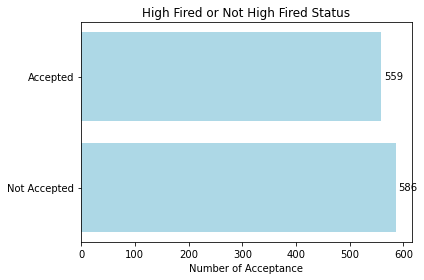

In [5]:
# Category labels (adjust based on your data)
categories = ('Accepted', 'Not Accepted')

# Create a bar plot with horizontal bars
fig, ax = plt.subplots()
y_pos = np.arange(len(categories))  # Positions for categories on the y-axis
x = (high_fired, not_highfired)  # Employee counts for each category

# Plot the bars
bars = ax.barh(y_pos, x, color='lightblue')  # Adjust color as needed

# Set y-axis labels and ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)

# Invert y-axis for top-to-bottom reading
ax.invert_yaxis()

# Set labels for x-axis and title
ax.set_xlabel('Number of Acceptance')
ax.set_title('High Fired or Not High Fired Status')

# Add data labels on top of each bar
for i, (v, bar) in enumerate(zip(x, bars)):
    ax.text(v + 5, i, f'{v}', va='center', fontweight='normal', color='black')  # Use f-string for formatting

# Display the plot
plt.tight_layout()  # Adjust spacing between elements for readability
plt.show()


In [6]:
# Calculate total employees (optional)
final_acceptance = high_fired + not_highfired

# Calculate percentages (as decimals for formatting)
percent_accepted = (high_fired / final_acceptance) * 100
percent_not_accepted = (not_highfired / final_acceptance) * 100

# Print formatted percentages with labels
print(f"Percentage Accepted: {percent_accepted:.1f}%")
print(f"Percentage Not Accepted: {percent_not_accepted:.1f}%")


Percentage Accepted: 48.8%
Percentage Not Accepted: 51.2%


In [7]:
data.isna().sum() # missing values

Elevation                   0
Grade_Type                  0
TDS_Level_of_Water (ppm)    0
pH_Level_of_Water           0
Tasting_Temperature (0C)    0
Brewing_Time (min)          0
pH_Value                    0
TDS_Value (ppm)             0
R                           0
G                           0
B                           0
Taste_Type                  0
Acceptance                  0
dtype: int64

In [8]:
qualitative = []
quantitative = []
threshold = 10  # Adjust this threshold as needed

for feature in data.columns:
    # Count the number of unique values in the feature
    n_unique = data[feature].nunique()

    # Categorize based on the threshold (adjust comments as needed)
    if n_unique <= threshold:
        qualitative.append(feature)
        # Feature is considered qualitative because it has a relatively low number of unique values,
        # suggesting it might represent categories or groups.
    else:
        quantitative.append(feature)
        # Feature is considered quantitative because it has a higher number of unique values,
        # potentially representing continuous or measurable aspects.

print("Qualitative Features:", qualitative)
print("Quantitative Features:", quantitative)


Qualitative Features: ['Elevation ', 'Grade_Type ', 'Tasting_Temperature (0C)', 'Brewing_Time (min)', 'Taste_Type ', 'Acceptance ']
Quantitative Features: ['TDS_Level_of_Water (ppm)', 'pH_Level_of_Water', 'pH_Value', 'TDS_Value (ppm)', 'R', 'G', 'B']


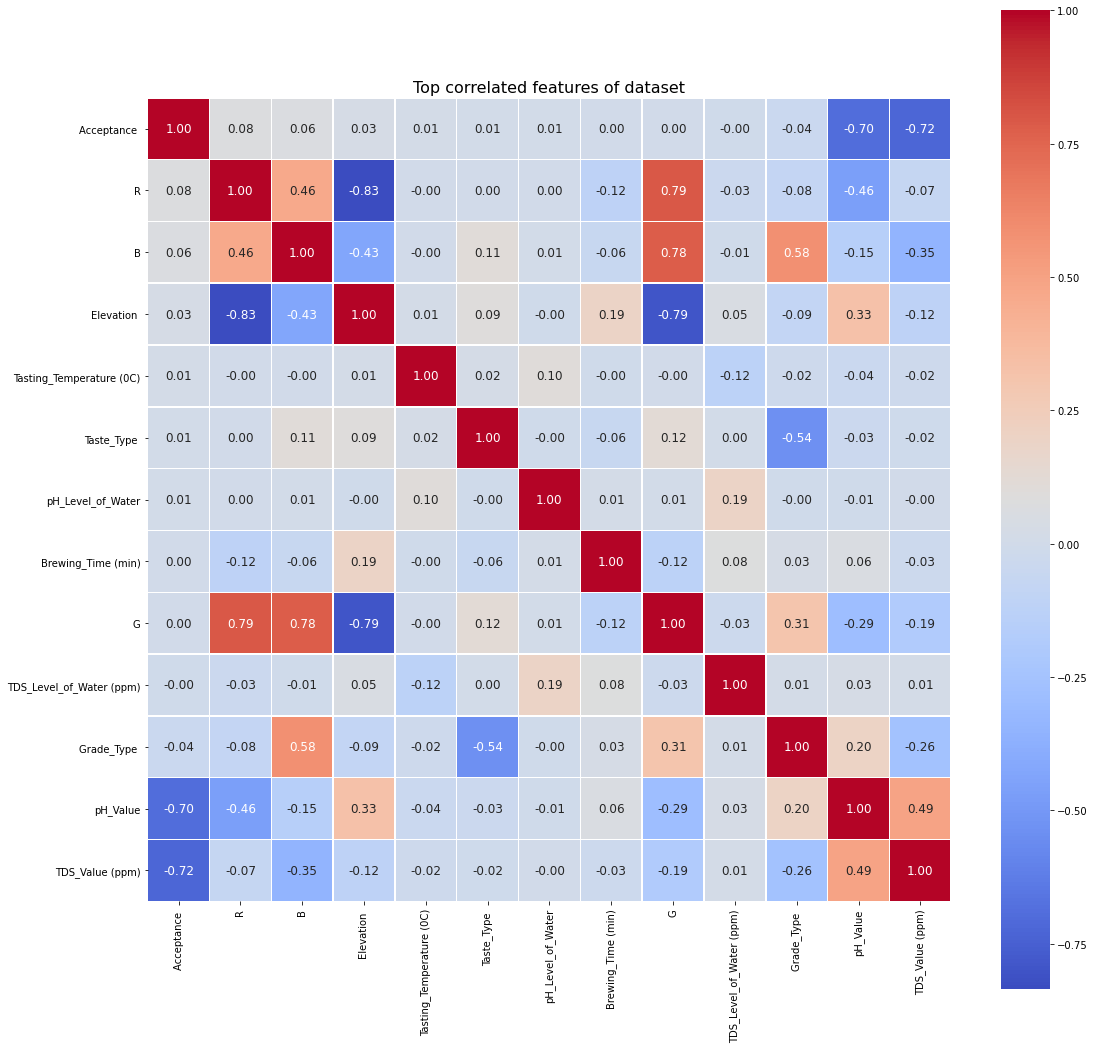

'\ncorrmat = data.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = data.columns != \'id\'\nsns.heatmap(data[data.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [9]:
import seaborn as sns
top = 15
corr = data.corr()
top15 = corr.nlargest(top, 'Acceptance ')['Acceptance '].index
corr_top15 = data[top15].corr()
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5, annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = data.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = data.columns != 'id'
sns.heatmap(data[data.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness of pH Values: -0.97


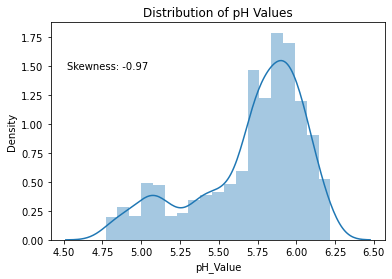

In [10]:
# Create the histogram distribution plot
ax = sns.distplot(data['pH_Value'])
ax.set_title('Distribution of pH Values')  # Add a title

# Calculate skewness
skewness = np.mean(((data['pH_Value'] - np.mean(data['pH_Value'])) / np.std(data['pH_Value']))**3)

# Print or display skewness information
print(f"Skewness of pH Values: {skewness:.2f}")  # Print skewness value

# Optional: Add text annotation to the plot (adjust coordinates as needed)
ax.text(0.05, 0.8, f"Skewness: {skewness:.2f}", ha='left', va='center', transform=ax.transAxes, fontsize=10)

plt.show()


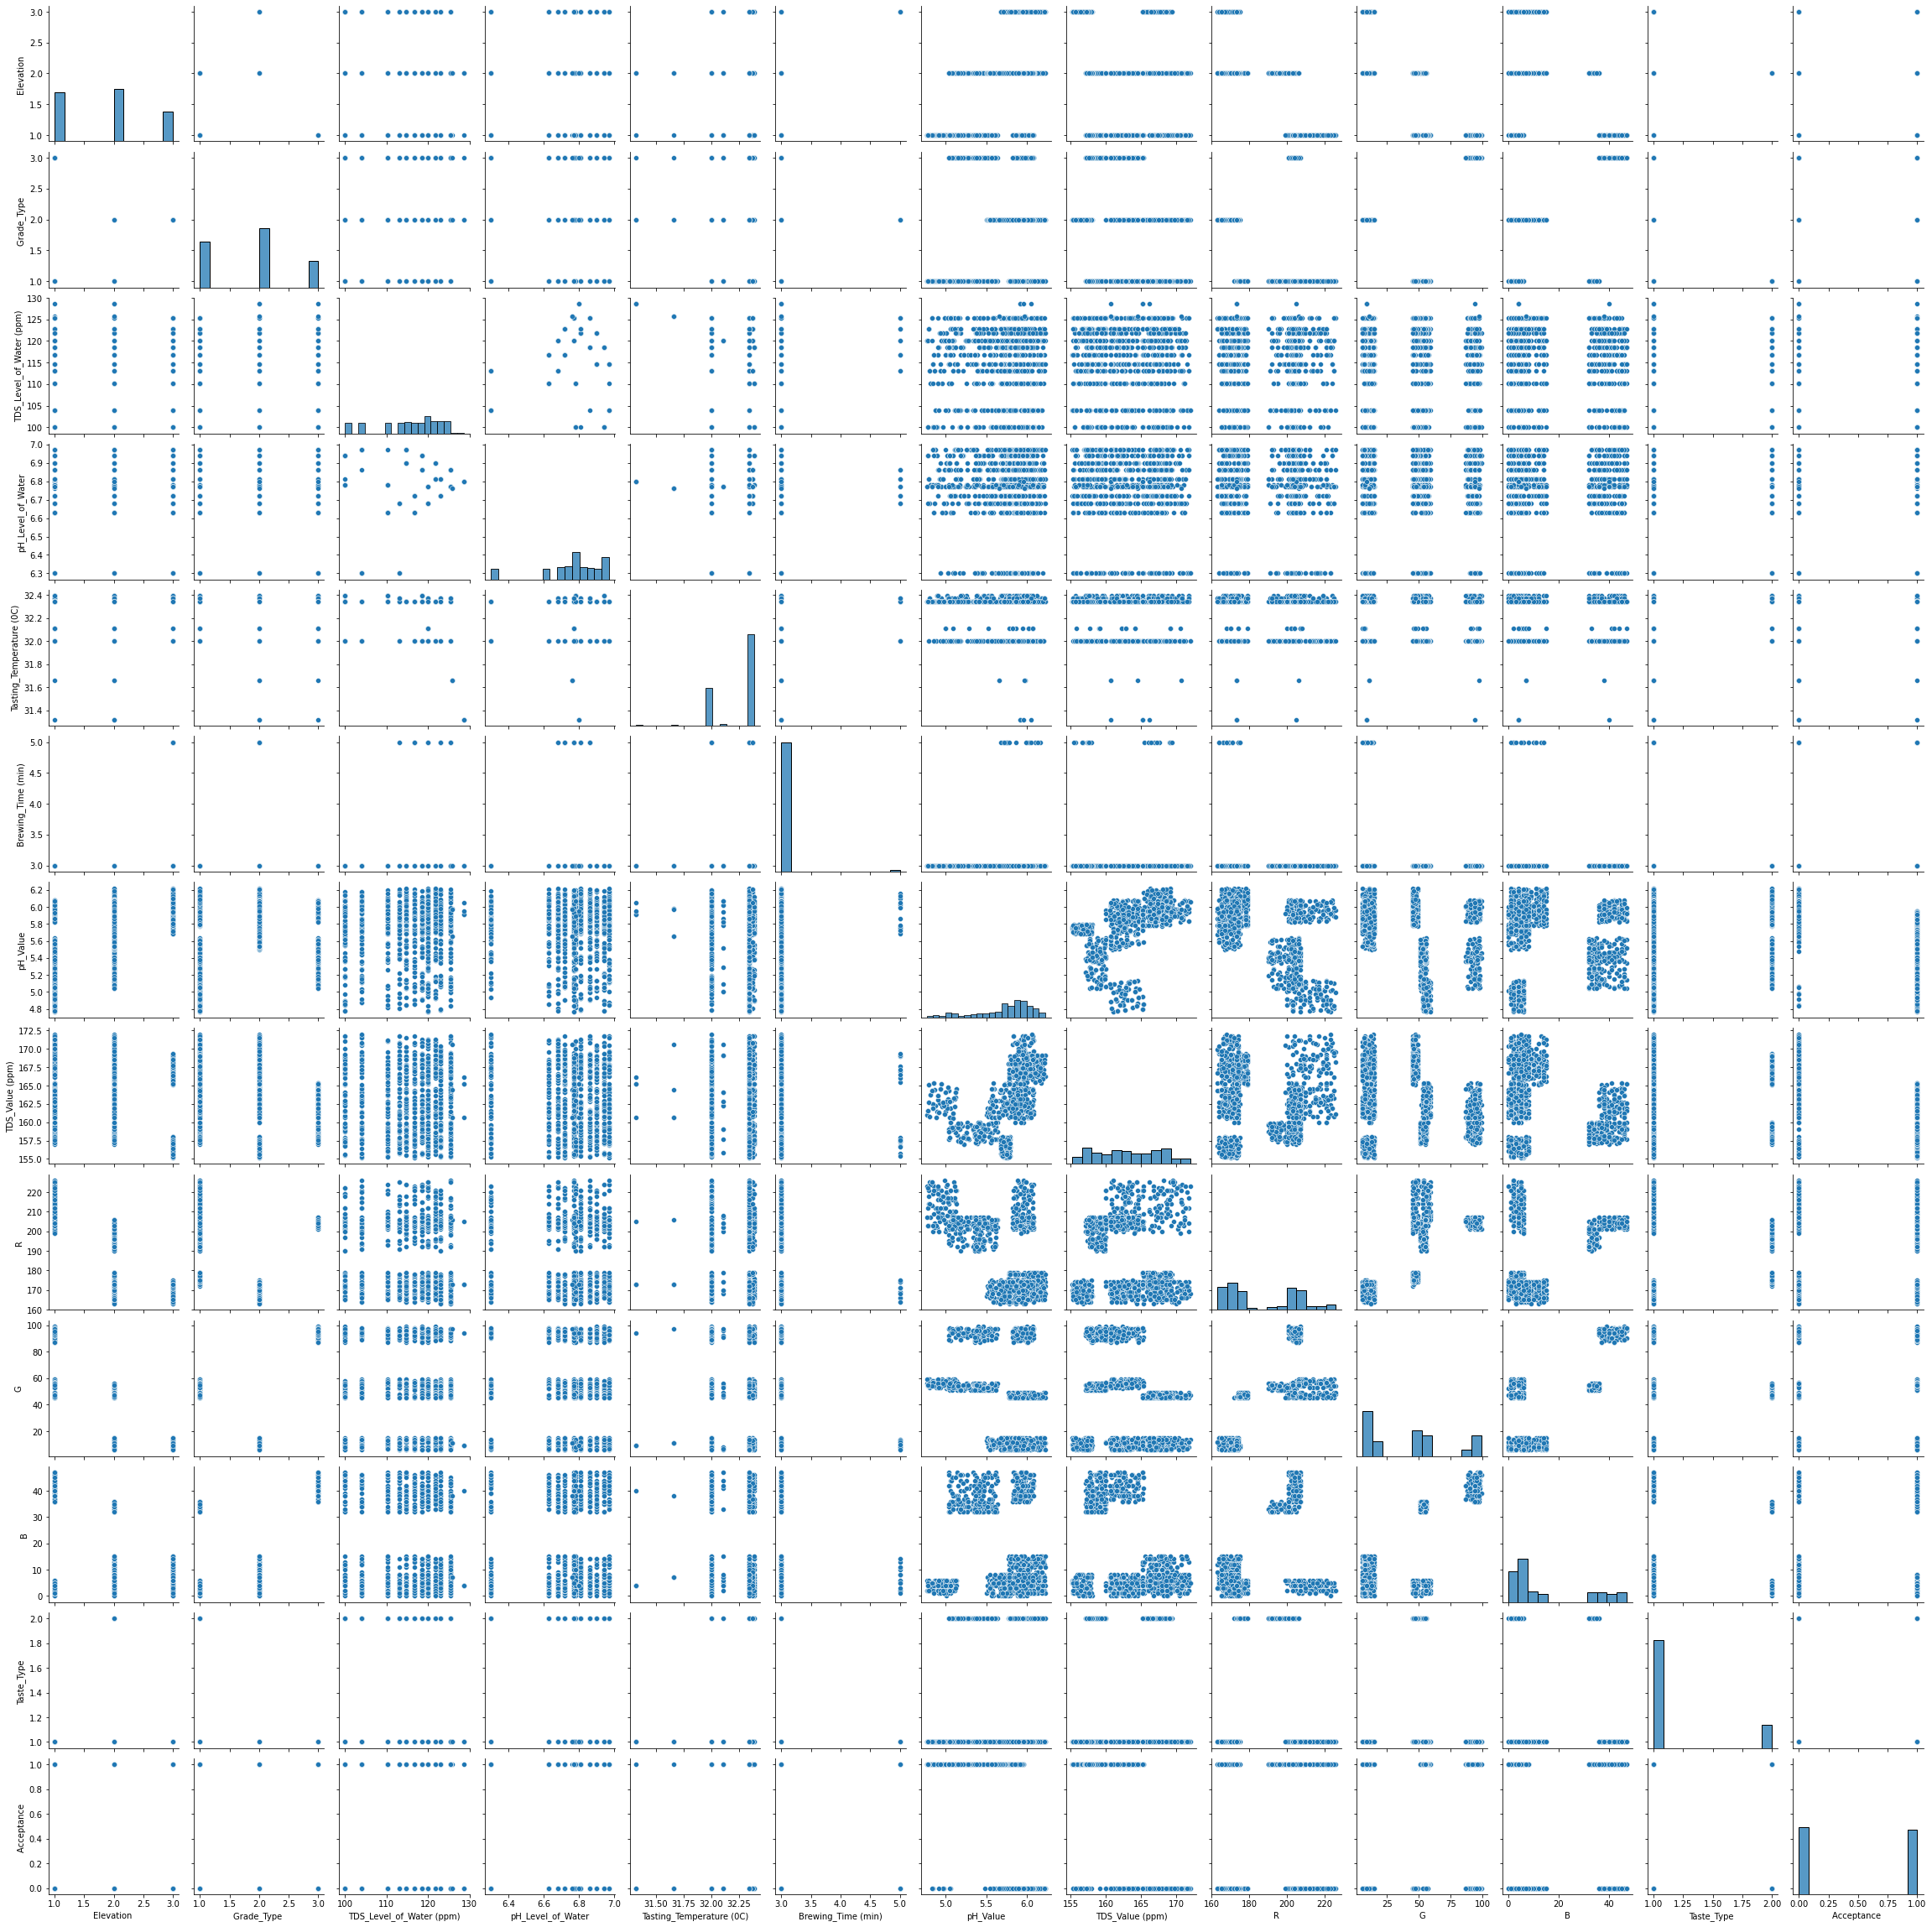

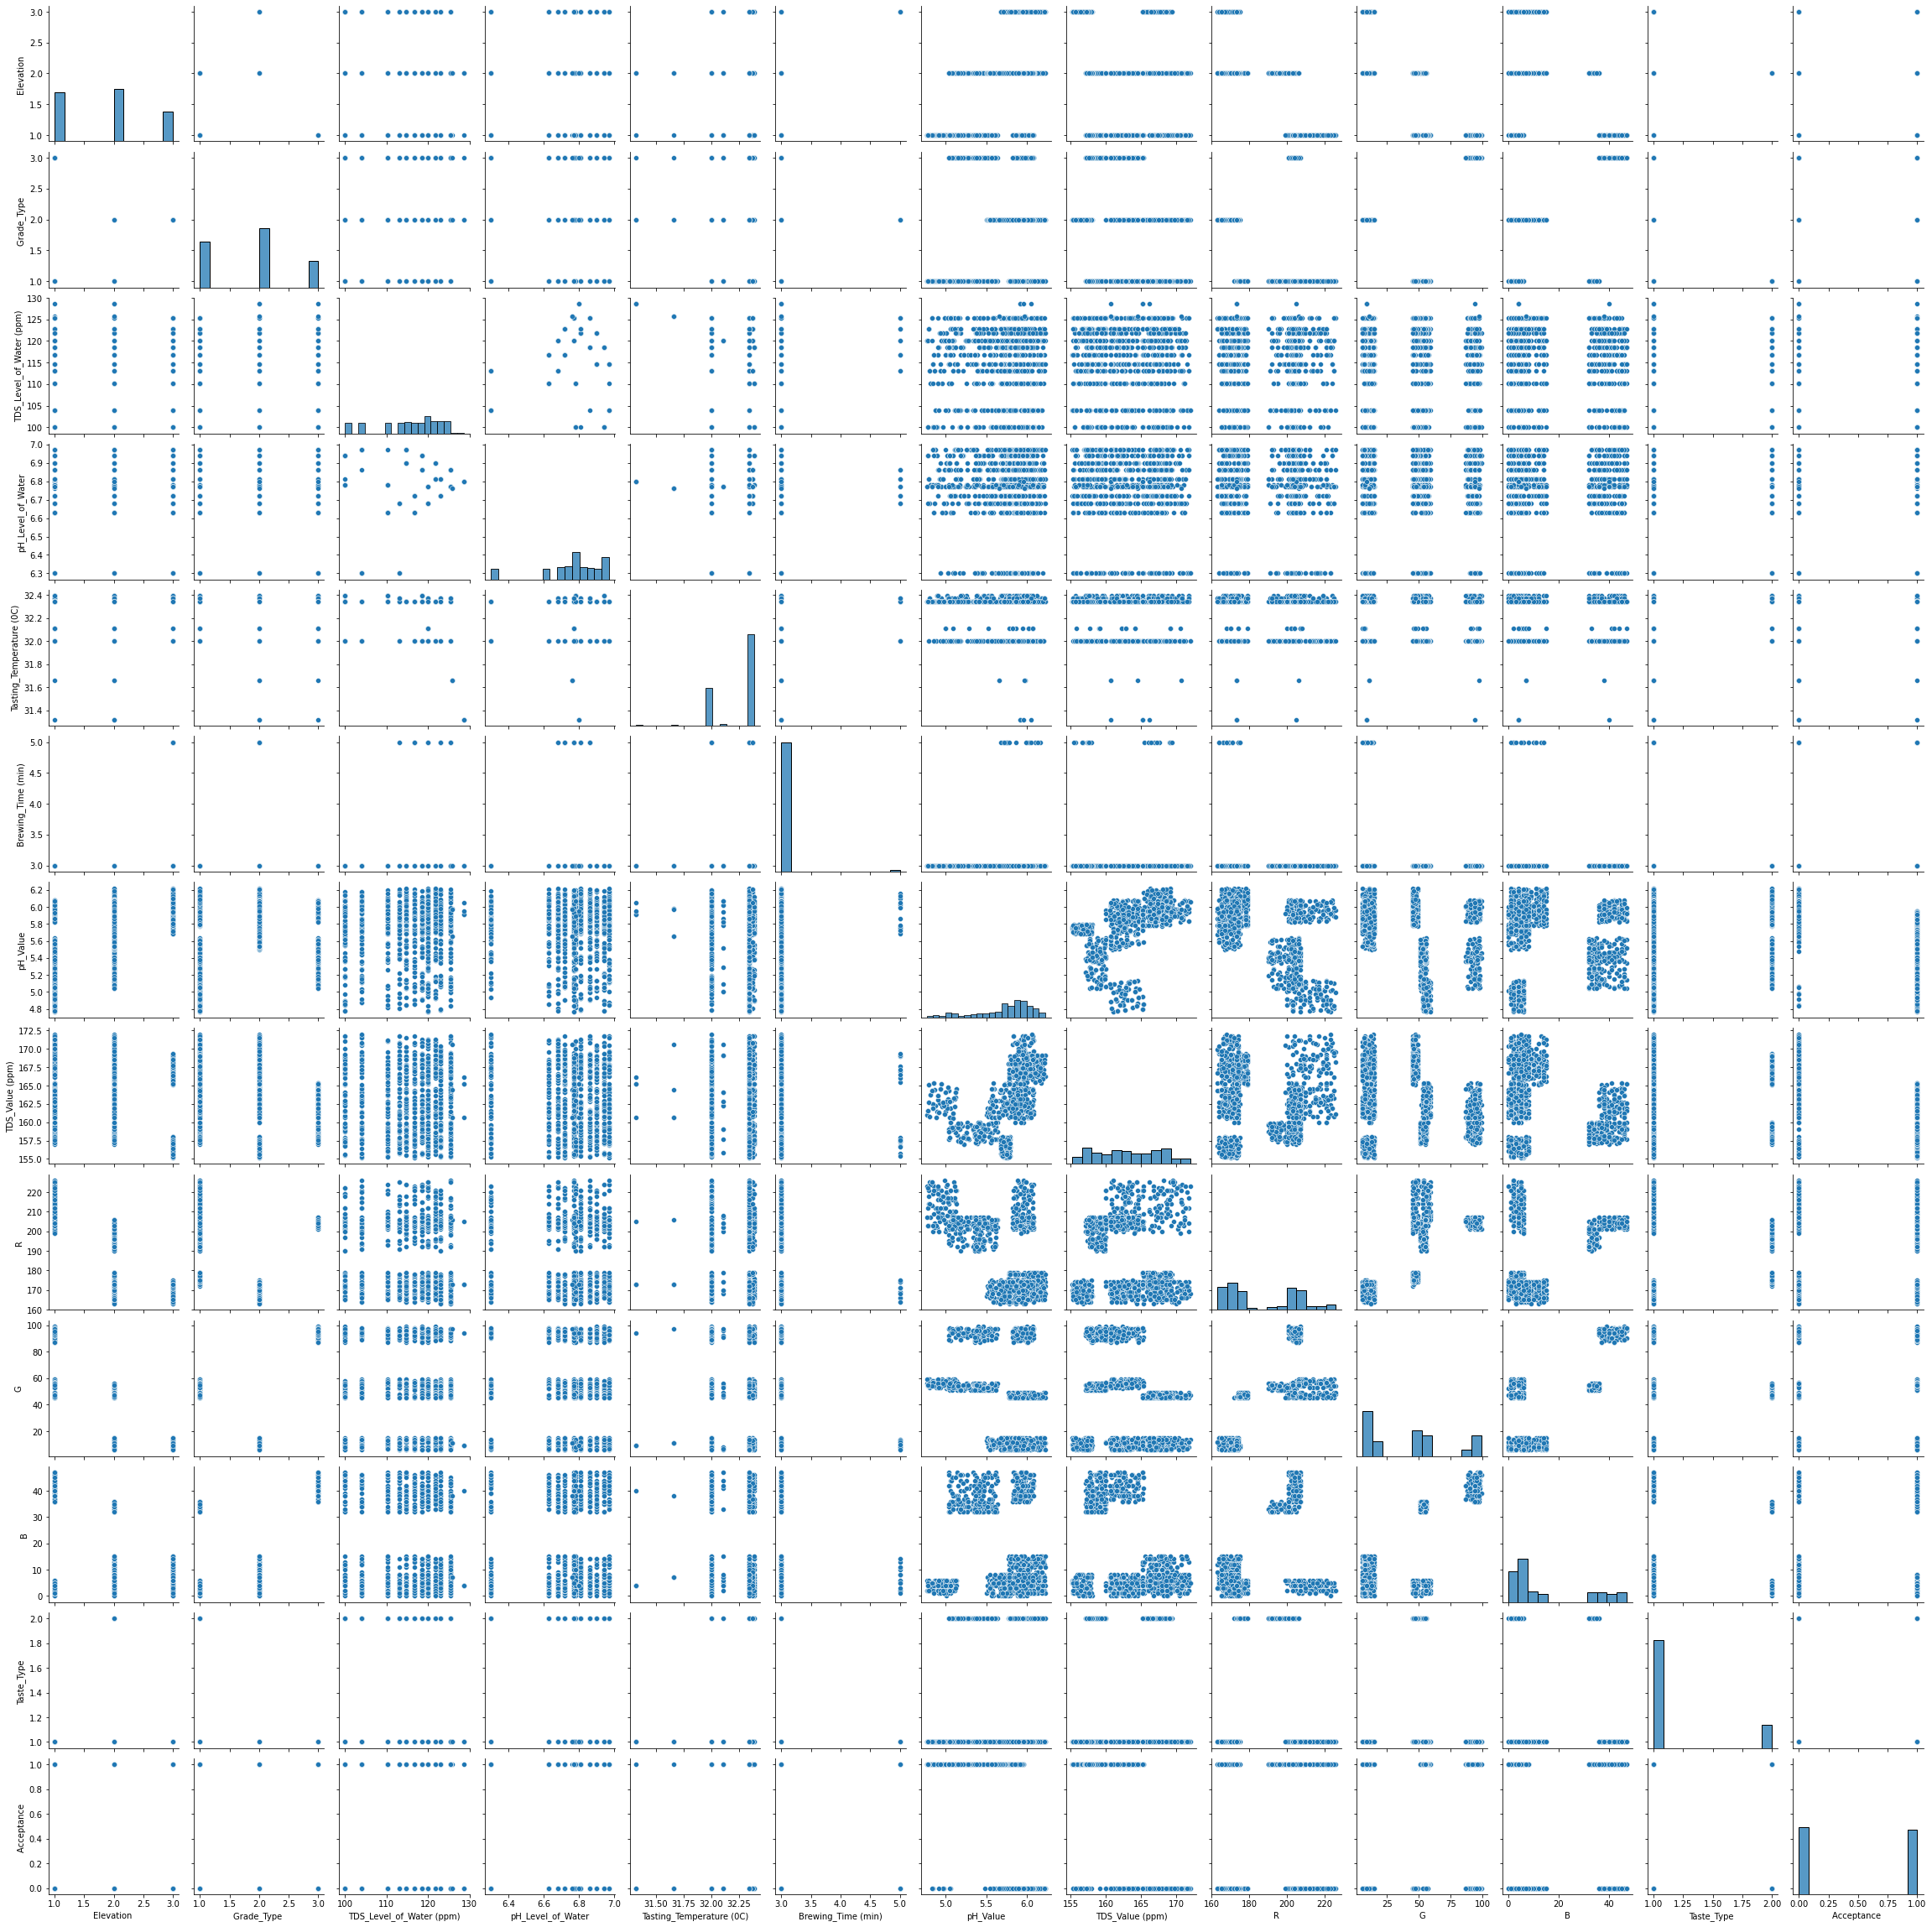

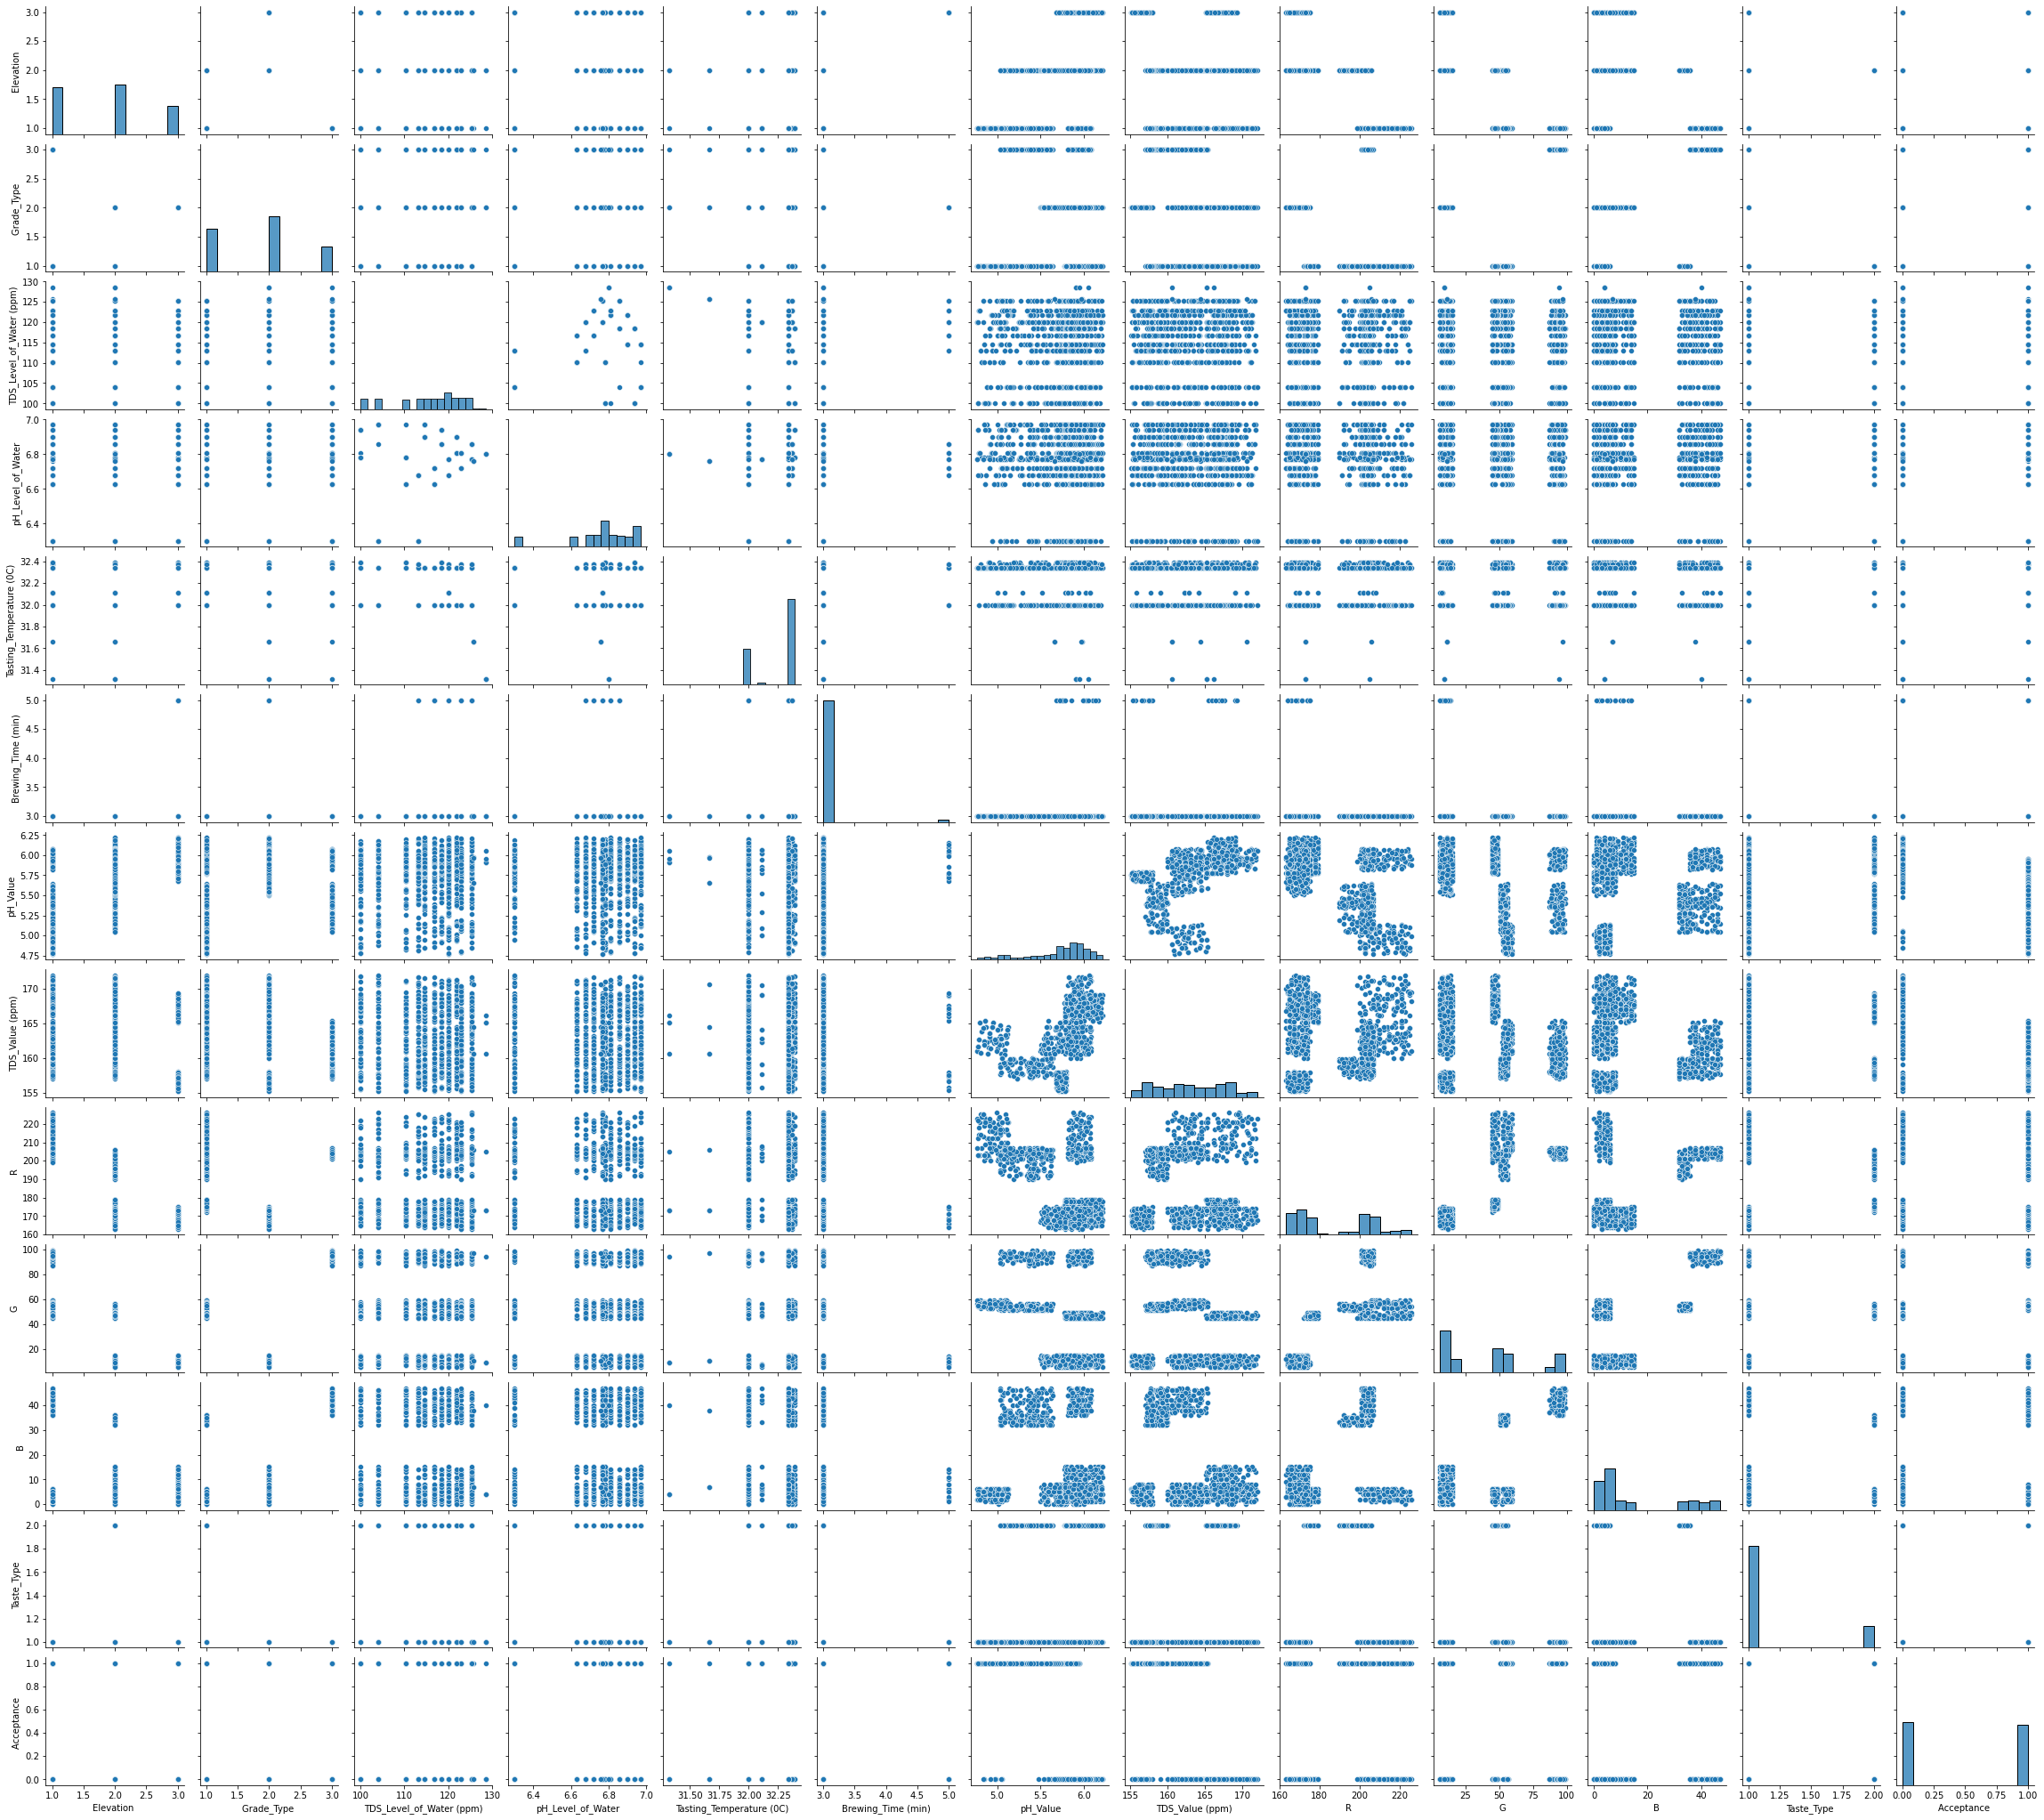

In [11]:
# Create a pair plot for all features in the DataFrame
sns.pairplot(data)

# - Set the diagonal to show histograms instead of scatter plots
sns.pairplot(data, diag_kind="hist")
# - Choose a different color palette for the plots
sns.pairplot(data, palette="RdGy")
# - Adjust the size of the plots
plt.subplots_adjust(top=0.88)  # Adjust top margin for better title visibility

plt.show()


In [12]:
# Separate features (X) from target variable (y)
X = data.drop('Acceptance ', axis=1)  # Drop 'Acceptance ' column for features
y = data['Acceptance ']  # Target variable

# Print the shapes of X and y
print('shape of X and y respectively:', X.shape, y.shape)

shape of X and y respectively: (1145, 12) (1145,)


In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (already separated into X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the shapes of training and testing sets
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)


shape of X and y respectively (train) : (916, 12) (916,)
shape of X and y respectively (test) : (229, 12) (229,)


# Random Forest Classifier

In [14]:
# Train and Evaluate a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Model selection and hyperparameter configuration
print("Model: Random Forest Classifier")
model = RandomForestClassifier(n_estimators=100)  # Adjust hyperparameters as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance on training and testing sets
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))

# Create a DataFrame of predictions
output = pd.DataFrame({'Predicted': y_pred})

# Identify predicted high-fired samples (assuming '1' indicates high-fired)
high_fired_predicted = output[output.Predicted == 1]




Model: Random Forest Classifier
Training Score: 0.9759825327510917
Testing Score: 0.9213973799126638


In [15]:
# Calculate high-fired prediction rate
if len(high_fired_predicted) > 0:
    high_fired_rate = len(high_fired_predicted) / len(y_test)
    print("% of High-Fired Tea Predicted:", high_fired_rate)
else:
    print("% of High-Fired Tea Predicted: 0.0 (No high-fired predicted in test set)")

# Classification report for detailed evaluation
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

% of High-Fired Tea Predicted: 0.4192139737991266
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       141
           1       0.86      0.94      0.90        88

    accuracy                           0.92       229
   macro avg       0.91      0.93      0.92       229
weighted avg       0.92      0.92      0.92       229



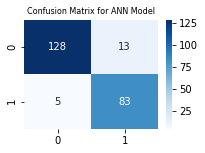

In [16]:
from sklearn.metrics import confusion_matrix
cmap1 = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(3,2))
cf_matrix = confusion_matrix(y_test, y_pred)

# Set fmt='d' to format numbers as integers
sns.heatmap(cf_matrix, cmap='Blues', annot=True, annot_kws={'size': 10}, fmt='g')
plt.title('Confusion Matrix for ANN Model',fontsize=8)
plt.show()

# Conclusion

In [17]:
output.to_csv('output.csv', index=False)
print("Success!")

Success!


In [18]:
output.head(3)

,Predicted
0,0
1,0
2,0
